In [1]:
from penalties import Simulation as penalty_simulation

First, we run a simulation with p = 0.5 (equal chance of scoring a goal or missing the penalty). 
We also compute the analytical expected value of how long the penalty shoot-out will be, using the observation that if we the penalties go to the end (i.e. after the first 5 penalties the two teams are drawing) this follows a geometric distribution with parameter $2 \cdot p \cdot (1-p)$ (for more details, read the .pdf solution).
Also, observe that, to simplify, in the statistical simulation if the penalty shoot-out finishes before five turns we still count five as the number of rounds.

In [2]:
"""
Define here the probability p of scoring a goal
"""
p = 0.5
sim = penalty_simulation(p)


"""
Define here the statistical parameters
"""
CONFIDENCE = 0.95
SAMPLES = 10000

observations = sim.get_confidence_interval(CONFIDENCE, SAMPLES)


def factorial(n):
    if n <= 1: return 1
    return factorial(n-1) * n

def binomial_coefficient(n,k):

    return factorial(n)/((factorial(k)*factorial(n-k)))

p_extra = 0

for i in range(6):

    p_i = binomial_coefficient(5,i) * (p**i) * (1-p)**(5-i)
    p_extra += p_i * p_i

e_val = 5 * (1-p_extra) + ((1/(float(2 * p * (1-p)))) + 5) * p_extra

print("Analytical expected value is: ", e_val)


The 95.0 % confidence interval for the mean of the population, setting p =  0.5  is: [ 5.474292981020628 5.518107018979372 ]
Analytical expected value is:  5.4921875


Next, we plot a histogram displaying the values obtained with the simulations. 
As you can observe, the distribution is very well concentrated around the mean.

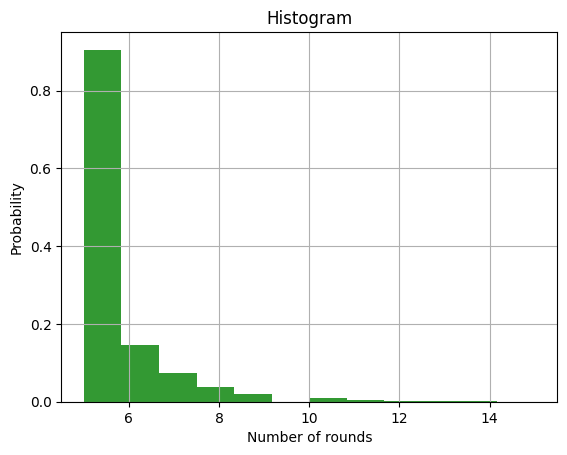

In [3]:
import matplotlib.pyplot as plt
plt.hist(observations, bins=12, color='green', alpha=0.8, density=True)
plt.xlabel('Number of rounds')
plt.ylabel('Probability')
plt.title('Histogram')
plt.grid(True)
plt.show()


It is also interesting to analyze how the mean value and the shape of the distribution change when varying the parameter p. 
Observe that, as one could have expected from the observation above regarding the geometric distribution, the result is pretty simmetrical (e.g. for $p = 0.05$ and $p = 0.95$ we get around the same average, as the analytical computation suggests.)

The 95.0 % confidence interval for the mean of the population, setting p =  0.05  is: [ 11.457645044986089 11.829754955013913 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.1  is: [ 7.504723025926453 7.679676974073547 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.2  is: [ 5.943087866653508 6.022112133346491 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.3  is: [ 5.601922061883608 5.657077938116393 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.4  is: [ 5.491885114712642 5.5361148852873585 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.5  is: [ 5.462665779110748 5.506134220889252 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.6  is: [ 5.5037121523432475 5.549887847656752 ]
The 95.0 % confidence interval for the mean of the population, setting p =  0.7  is: [ 5.597768905239009 5.6524310947609

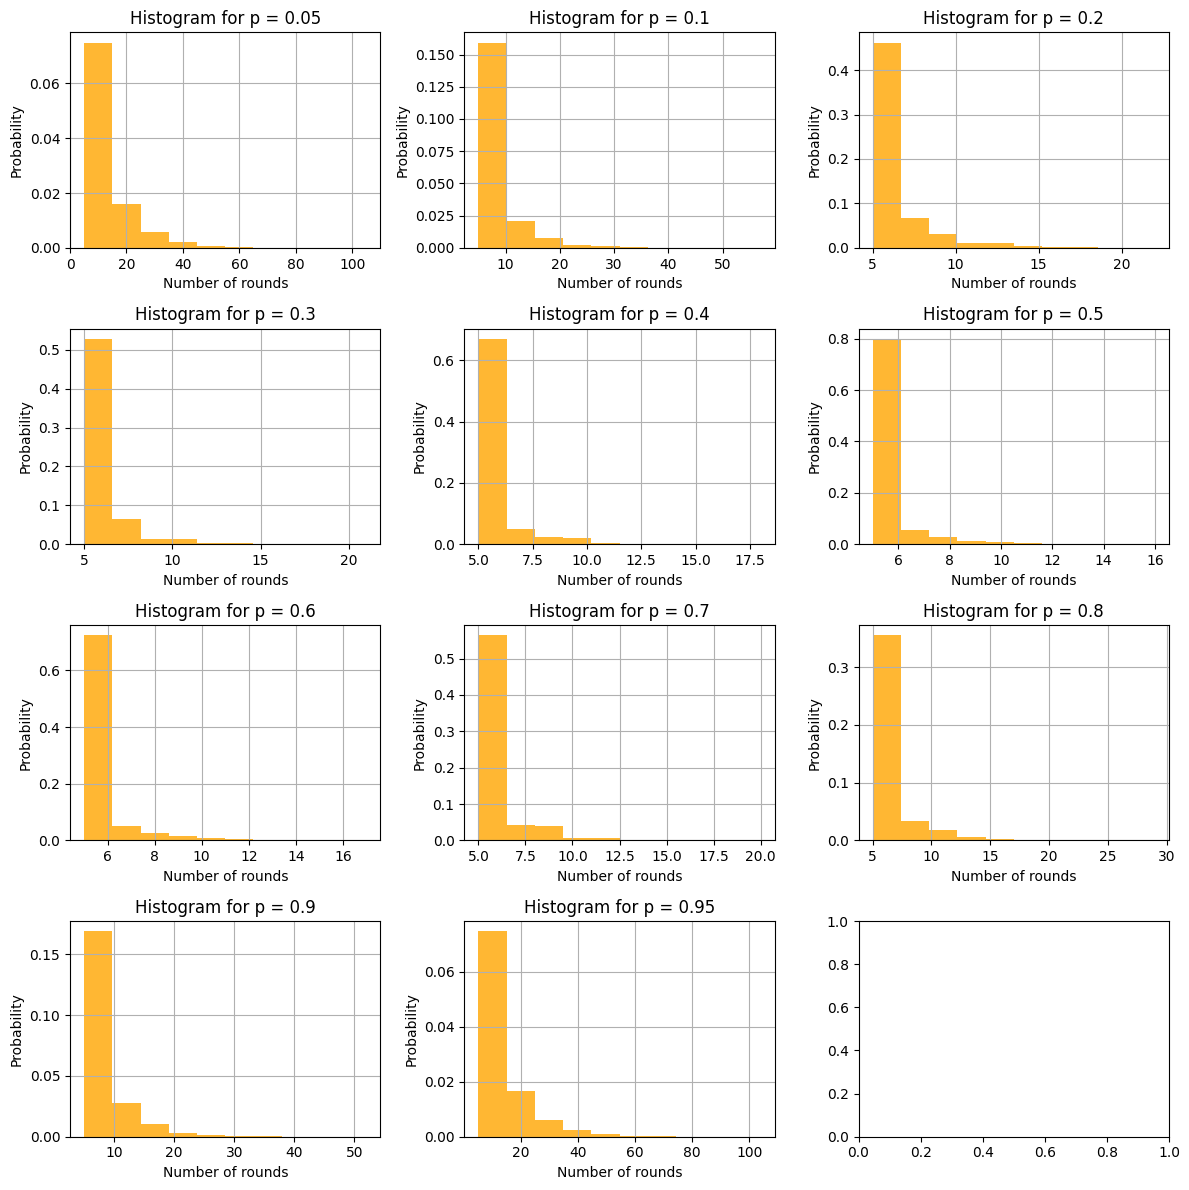

In [4]:
probs = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

for i, p in enumerate(probs):
    sim_p = penalty_simulation(p)
    observations_p = sim_p.get_confidence_interval(CONFIDENCE, SAMPLES)
    row = i // 3
    col = i % 3

    axes[row, col].hist(observations_p, bins=10, color='orange', alpha=0.8, density = True)
    axes[row, col].set_xlabel('Number of rounds')
    axes[row, col].set_ylabel('Probability')
    axes[row, col].set_title(f'Histogram for p = {p}')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()